# Tutorial #4
## Make predictions with Production Models

In this tutorial, we use a ProductionModel - from the NeuralLib collection in hugging face - as a function.

### Pre-tutorial

In [1]:
# Cell to be removed once the package is stable
import sys
import os

# Get the absolute path of your project directory
project_path = os.path.abspath("..")

# Add the project directory to sys.path
if project_path not in sys.path:
    sys.path.append(project_path)

### Imports

In [2]:
import NeuralLib.model_hub as mh
from NeuralLib.architectures import post_process_peaks_binary
import os
import numpy as np
import matplotlib.pyplot as plt

### Example signal

In [3]:
from NeuralLib.config import DATASETS_ECG_G
path_sig = os.path.join(DATASETS_ECG_G, 'x', 'test')
path_idx = os.path.join(DATASETS_ECG_G, 'y_idx', 'test')  # optional: true peak indices
i = 0
file = os.listdir(path_sig)[i]
test_signal = np.load(os.path.join(path_sig, file))
idx = np.load(os.path.join(path_idx, file))

### Check Production Models available in the NeuralLib Collection

In [4]:
mh.list_production_models()

ECGPeakDetector
ECGDenoiser
ECGDenoiserNL


### Import chosen model

In [13]:
peak_detector = mh.ProductionModel(model_name="ECGPeakDetector")

Using cached model files at: C:\Users\Catia Bastos\dev\hugging_prodmodels\ECGPeakDetector
✅ ECGPeakDetector successfully initialized.


### Make predictions using the chosen model

In [14]:
peak_detector.task == 'classification' and not peak_detector.multi_label

False

In [15]:
predicted_peaks = peak_detector.predict(
    X=test_signal,
    gpu_id=None,
    post_process_fn=post_process_peaks_binary,  # post_process_peaks_binary: defined function for post-processing the output from ECGPeakDetector
    threshold=0.5,  # parameter of post_process_peaks_binary
    filter_peaks=True,  # parameter of post_process_peaks_binary
)

No GPU available, using CPU.
Using device: cpu


### Check results (w/ comparison with true labels)

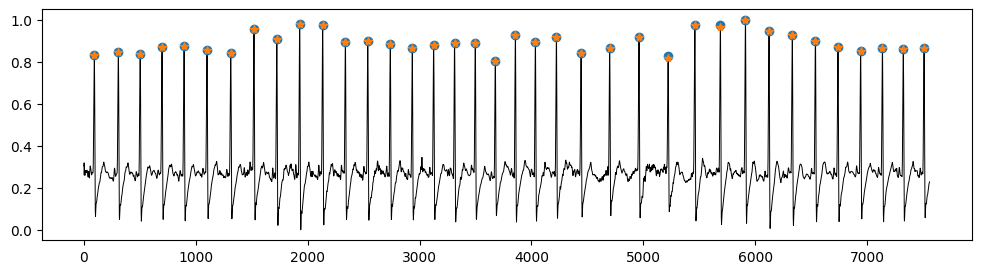

In [16]:
plt.figure(figsize=[12,3])
plt.plot(test_signal, 'k', lw=0.7)
plt.plot(idx, test_signal[idx], 'o')
plt.plot(predicted_peaks, test_signal[predicted_peaks], '*')
plt.show()

In [17]:
print("Predicted Peaks:", predicted_peaks)

Predicted Peaks: [  92  307  502  698  895 1100 1312 1520 1724 1928 2134 2337 2537 2738
 2935 3126 3313 3498 3677 3857 4036 4224 4444 4700 4962 5222 5461 5689
 5914 6124 6333 6539 6741 6944 7139 7325 7511]
